# Populations

In a statistical mindset we respond questions about **populations** rather than about individuals.

**Questions about individuals**
- What is the distance reached by a cannonball fired with a certain angle, force, wind resistance, etc.?
- At what time will this machine fail?

**Questions about populations**
- What is the probability of observing a trilobite larger than 3cm long?
- If I see a trilobite 3cm long is it more likely for it to belong to the African or the American species?
- If I apply certain process to all my products what is the probability to get a faulty one?

Sometimes it is not possible to reason about individuals. Maybe we do not have an accurate model about their behavior, the world is instrinsically noisy, etc.

# Distributions

A distribution is a general description of a certain characteristic of a population (for instance, trilobite length).

- Sometimes we are given the exact distribution that a population follows (trilobite lengths follow a truncated normal distribution with mean 3 and std 0.5)
- Sometimes we are given a sample of a population and that is all we have to answer questions.

### known distributions

Certain processes yield populations with well known distributions.

- A normal (gaussian) distribution appears very commonly in nature with continuous values.
- A Poisson distribution  expresses the probability of a given number of events occurring in a fixed interval of time.
- A Bernoulli distribution describes binary experiments (YES/NO, 0/1, heads/tails, ...)


# Example

we are given the following sample of 10000 **american trilobites** which have been captured in nature and their width and length measured

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tr1 = pd.read_csv("data/trilobites1.csv.gz")
print tr1.shape
tr1

(10000, 2)


,length,width
0,2.673751,1.078531
1,3.570652,1.080107
2,2.594188,1.372952
3,3.129163,1.367189
4,3.370358,1.482623
5,4.179161,1.212016
6,2.548383,1.262506
7,3.472026,1.320668
8,3.220176,1.217785
9,3.287574,1.474200


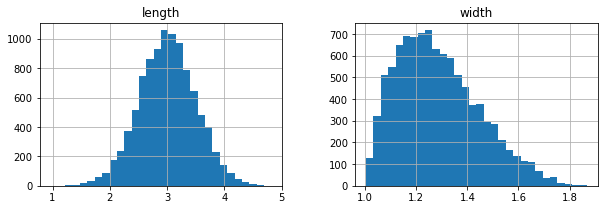

In [3]:
tr1.hist(bins=30, figsize=(10,3));

do these distributions look familiar?

what is the probability of finding a trilobite with length>4? 

$\rightarrow$ **observe the power of matrix notation**, try to understand what type of object is generated at each part of the following expressions

In [4]:
print "%.3f"%np.mean(tr1.length), "%.3f"%np.std(tr1.length)
print "%.3f"%np.mean(tr1.width), "%.3f"%np.std(tr1.width)
print "%.3f"%np.mean(tr1.length>4)

3.008 0.495
1.286 0.160
0.022


we just answered the question empirically ... we can also answer the question using the gaussian distribution analitically if we consider we have enough evidence to assume the length is distributed normally. Observe we use the CDF.

In [5]:
import scipy.stats as stats
print "%.3f"%(1-stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length)).cdf(4))

0.023


are length and width correlated??

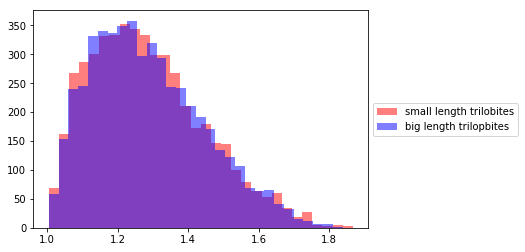

In [6]:
plt.hist(tr1[tr1.length<3].width.values, bins=30, color="red", alpha=.5, label="small length trilobites");
plt.hist(tr1[tr1.length>=3].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [7]:
np.corrcoef(tr1.length, tr1.width)

array([[ 1.        , -0.00304669],
       [-0.00304669,  1.        ]])

now we are given a sample from 10000 **african trilobites**

(10000, 2)


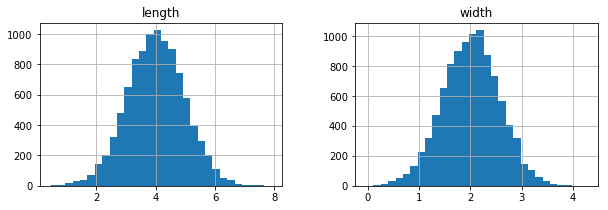

In [8]:
tr2 = pd.read_csv("data/trilobites2.csv.gz")
print tr2.shape
tr2.hist(bins=30, figsize=(10,3));

and ask the same questions

In [9]:
print "%.3f"%np.mean(tr2.length), "%.3f"%np.std(tr2.length)
print "%.3f"%np.mean(tr2.width), "%.3f"%np.std(tr2.width)
print "%.3f"%np.mean(tr2.length>4)

4.006 0.960
2.013 0.553
0.504


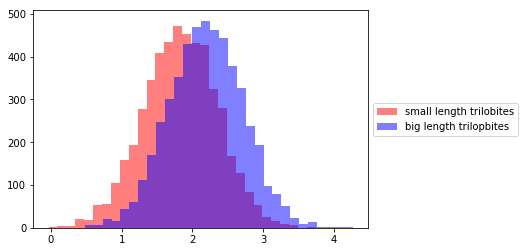

In [10]:
plt.hist(tr2[tr2.length<4].width.values, bins=30, color="red", alpha=.5, label="small length trilobites");
plt.hist(tr2[tr2.length>=4].width.values, bins=30, color="blue", alpha=.5, label="big length trilopbites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))

In [11]:
np.corrcoef(tr2.length, tr2.width)

array([[ 1.        ,  0.41599215],
       [ 0.41599215,  1.        ]])

let's compare the populations. observed histograms are _normalized_

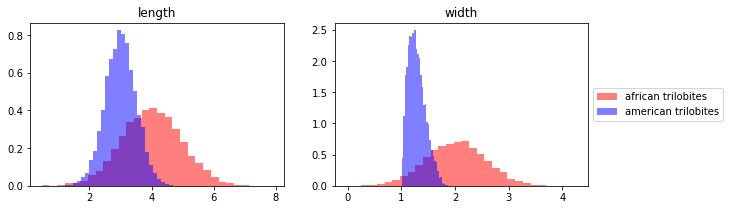

In [12]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(tr2.length.values, bins=30, normed=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.length.values, bins=30, normed=True, color="blue", alpha=.5, label="american trilobites");
plt.title("length")
plt.subplot(122)
plt.hist(tr2.width.values, bins=30, normed=True, color="red", alpha=.5, label="african trilobites")
plt.hist(tr1.width.values, bins=30, normed=True, color="blue", alpha=.5, label="american trilobites");
plt.legend(loc="center left", bbox_to_anchor=(1,.5))
plt.title("width")

and we can see the correlations more in a more global manner

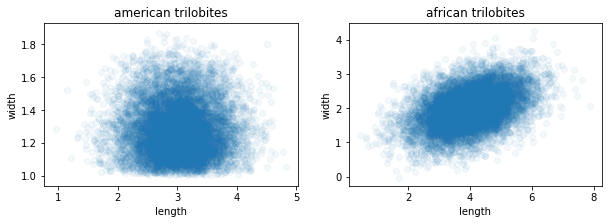

In [13]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.scatter(tr1.length, tr1.width, alpha=.05)
plt.title("american trilobites")
plt.xlabel("length")
plt.ylabel("width")
plt.subplot(122)
plt.scatter(tr2.length, tr2.width, alpha=.05)
plt.title("african trilobites")
plt.xlabel("length")
plt.ylabel("width")


# Distributions in Python

- via `numpy` (mostly for sampling, very fast)
- via `scipy.stats` (pdf, cdf, intervals, etc.)


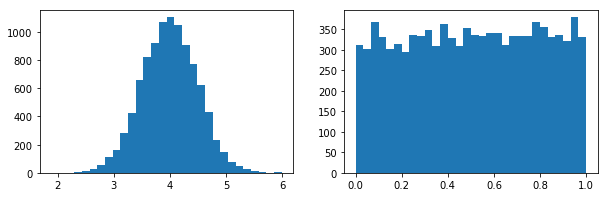

In [14]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sample = np.random.normal(loc=4, scale=.5, size=10000)
plt.hist(sample, bins=30);
plt.subplot(122)
sample = np.random.random(size=10000)
plt.hist(sample, bins=30);

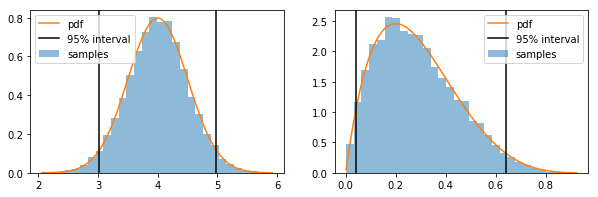

In [15]:
plt.figure(figsize=(10,3))
plt.subplot(121)
d1 = stats.norm(loc=4, scale=.5)
samples = d1.rvs(10000)
plt.hist(samples, bins=30, normed=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d1.pdf(t), label="pdf")
interval = d1.interval(.95)
plt.axvline(interval[0], color="black", label="95% interval")
plt.axvline(interval[1], color="black")
plt.legend()

plt.subplot(122)
d2 = stats.beta(a=2, b=5)
samples = d2.rvs(10000)
plt.hist(samples, bins=30, normed=True, alpha=.5, label="samples");
t = np.linspace(np.min(samples), np.max(samples), 100)
plt.plot(t, d2.pdf(t), label="pdf")
interval = d2.interval(.95)
plt.axvline(interval[0], color="black", label="95% interval")
plt.axvline(interval[1], color="black")
plt.legend()

comparing execution times for sampling

In [16]:
%timeit np.random.normal(10000)

The slowest run took 14.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.04 µs per loop


In [17]:
%timeit d1.rvs(10000)

1000 loops, best of 3: 863 µs per loop


# Classification

now we find a set of new trilobites with lengths 2, 3 and 4

**which class do you think they belong to? with what probability?**
 

In [18]:
gaussian1 = stats.norm(loc=np.mean(tr1.length), scale=np.std(tr1.length))
gaussian2 = stats.norm(loc=np.mean(tr2.length), scale=np.std(tr2.length))
print "%.3f"%gaussian1.pdf(2)
print "%.3f"%gaussian2.pdf(2)
print "--"
print "%.3f"%gaussian1.pdf(3)
print "%.3f"%gaussian2.pdf(3)
print "--"
print "%.3f"%gaussian1.pdf(4)
print "%.3f"%gaussian2.pdf(4)


0.101
0.047
--
0.806
0.240
--
0.108
0.416


# Law of Large Numbers

1. Take a sample of size 2,3,4,...,1000 from any distritbution
2. Compute the **sample mean** for each sample size
3. Plot the **sample means** and compare them with the actual population mean
4. Repeat 2 times

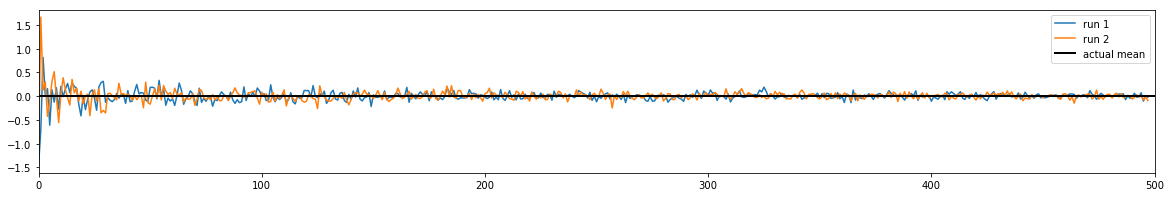

In [19]:
plt.figure(figsize=(20,3))
for i in range(1,3):
    sample_means= [np.mean(np.random.normal(size=N)) for N in range(2,500)]
    plt.plot(sample_means, label="run %d"%i)
plt.axhline(0, label="actual mean", color="black", lw=2)
plt.xlim(0,500)
plt.legend()


# Central Limit Theorem

1. Take a sample of size N=2 from any distribution
2. Compute the **sample mean**
3. Repeat 100 times

4. Plot the distribution of the **sample mean**
5. Repeat for N=4,10,30

**Agregations of i.i.d. random variables are distributed as a Gaussian**:

$$\frac{X_1 + X_2 + ... + X_N}{N} \sim \mathcal{N}(\mu(X), \frac{\sigma(X)}{\sqrt{N}} )$$

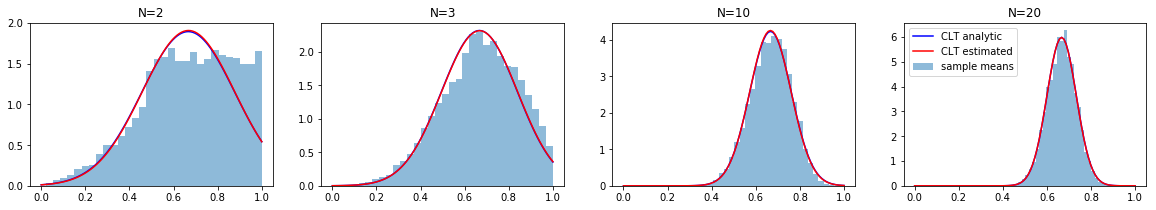

In [20]:
plt.figure(figsize=(20,3))

a,b = 1.,.5
distrib = stats.beta(a=a,b=b)
d_mean = a/(a+b)
d_std  = np.sqrt(a*b/((a+b+1)*(a+b)**2))

# use the following defs to try with a uniform source distribution
#distrib = stats.uniform()
#d_mean, d_std = .5, np.sqrt(1./12)

for i,N in enumerate([2,3,10,20]):
    sample_means = []
    for _ in range(10000):
        sample_of_size_N = distrib.rvs(N)
        sample_means.append(np.mean(sample_of_size_N))
    plt.subplot(1,4,i+1)
    x = np.linspace(0,1,100)
    plt.hist(sample_means, bins=30, normed=True, alpha=.5, label="sample means");
    ref = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
    plt.plot(x, ref.pdf(x), label="CLT analytic", color="blue")
    ref = stats.norm(loc=np.mean(sample_means), scale=np.std(sample_means))
    plt.plot(x, ref.pdf(x), label="CLT estimated", color="red")
    plt.title("N=%d"%N)
plt.legend()

# Testing hypothesis

In average student's grades in a course is 3.9 and its standard deviation is 0.76. This semester, my class of 20 students had an average of 3.5:

- Has something gone wrong this semester?
- Is it just a statistical fluctuation?

**Reformulate the question**: If nothing went wrong, how likely is it to obtain a sample of 20 students having an average of 3.5? 

If it is very unlikely (say <5% probability), then we have evidence to think that this **IS NOT** a random fluctuation.

Let's answer by brute force.

1. Assume grades follow some distribution with mean 3.9
2. Take a sample of size 20 an compute the **sample mean**
3. Repeat 10000 times step 2
4. Plot the histogram of the **sample means**
5. Is 3.5 within a 95% confidence interval?

We can also answer analytically with CLT

1. Build a Gaussian distribution with mean and std as described above
2. Compute 95% confidence intervals

P-value
empirical  prob <3.5 = 0.013
analytical prob <3.5 = 0.009


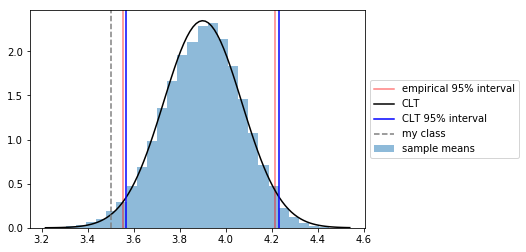

In [21]:
def ht(N):
    # first by brute force
    d = stats.beta(a=5, b=1.41)
    sample_means = np.r_[[np.mean(d.rvs(size=N)*5) for _ in xrange(10000)]]
    print "P-value"
    print "======="
    print "empirical  prob <3.5 = %.3f"%np.mean(sample_means<3.5)
    plt.hist(sample_means, bins=30, alpha=.5, normed=True, label="sample means");
    empirical_interval = np.percentile(sample_means, [2.5, 97.5])    
    plt.axvline(empirical_interval[0], color="red",  alpha=.5)
    plt.axvline(empirical_interval[1], color="red",  alpha=.5, label="empirical 95% interval")
    
    # now analytical
    t = np.linspace(np.min(sample_means), np.max(sample_means), 100)
    ref = stats.norm(loc=3.9, scale=0.76/np.sqrt(N))
    plt.plot(t, ref.pdf(t), label="CLT", color="black")

    interval = ref.interval(.95)
    plt.axvline(interval[0], color="blue", label="CLT 95% interval")
    plt.axvline(interval[1], color="blue")

    plt.axvline(3.5, color="gray", ls="--", label="my class")
    plt.legend(loc="center left", bbox_to_anchor=(1,.5))

    print "analytical prob <3.5 = %.3f"%ref.cdf(3.5)
    
ht(20)

observe what happens if our class was smaller or larger.

- smaller samples: confidence interval grows, distribution still not converged to normal (CLT needs larger samples)
- larger samples: confidence interval shrinks and CLT works good

P-value
empirical  prob <3.5 = 0.128
analytical prob <3.5 = 0.120


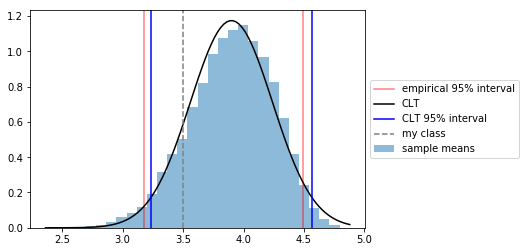

In [22]:
ht(5)

P-value
empirical  prob <3.5 = 0.001
analytical prob <3.5 = 0.000


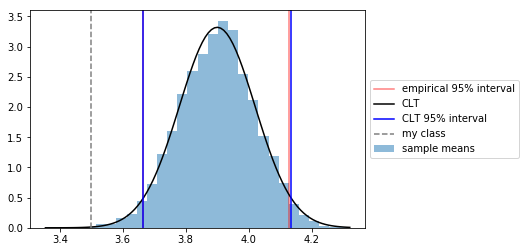

In [23]:
ht(40)